# Color Compression

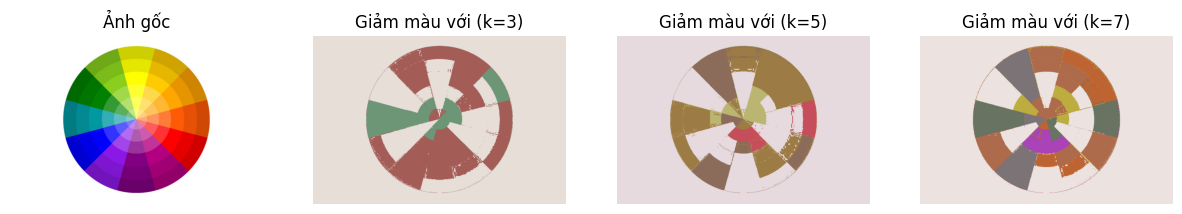

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

def kmeans(img_1d, k_clusters, max_iter, init_centroids='random'):
    num_channels = img_1d.shape[1]
    num_pixels = img_1d.shape[0]
    
    # Khởi tạo centroids
    if init_centroids == 'random':
        centroids = np.random.randint(0, 256, size=(k_clusters, num_channels), dtype=np.uint8)
    elif init_centroids == 'in_pixels':
        random_indices = np.random.randint(0, num_pixels, size=k_clusters)
        centroids = img_1d[random_indices]
    else:
        raise ValueError("Invalid initialization method. Please choose 'random' or 'in_pixels'.")
    
    for _ in range(max_iter):
        # Tính toán khoảng cách của mỗi pixel đến các centroids
        distances = np.linalg.norm(img_1d[:, np.newaxis] - centroids, axis=2)
        
        # Gán mỗi pixel vào cụm gần nhất
        labels = np.argmin(distances, axis=1)
        
        # Cập nhật centroids
        for i in range(k_clusters):
            centroids[i] = np.mean(img_1d[labels == i], axis=0)
    
    return centroids, labels

# Đọc ảnh
image = Image.open('../nguyen-ly-mau-sac-va-phan-ung-cua-mat-nguoi-3.jpeg')

# Chuyển đổi ảnh
img_array = np.array(image)

# Reshape ảnh thành mảng 1D
img_1d = img_array.reshape(-1, 3)

# Giá trị k để thử nghiệm
k_values = [3, 5, 7]

# Hiển thị ảnh kết quả với từng giá trị k
fig, axes = plt.subplots(1, len(k_values) + 1, figsize=(15, 5))

axes[0].imshow(image)
axes[0].set_title('Ảnh gốc')
axes[0].axis('off')

for i, k in enumerate(k_values):
    # Thực hiện K-means
    max_iterations = 10
    centroids, labels = kmeans(img_1d, k, max_iterations)

    # Thay thế màu của mỗi pixel bằng màu của centroid tương ứng
    reduced_img_1d = centroids[labels]
    reduced_img_array = reduced_img_1d.reshape(img_array.shape).astype(np.uint8)

    # Tạo ảnh từ mảng numpy
    reduced_image = Image.fromarray(reduced_img_array)

    # Hiển thị ảnh kết quả
    axes[i+1].imshow(reduced_image)
    axes[i+1].set_title(f'Giảm màu với (k={k})')
    axes[i+1].axis('off')

plt.show()